<a href="https://colab.research.google.com/github/Rohanpeerla/Module-5-Lab-4/blob/master/Module_5_Lab_4_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
data = {
    "Survived": [0, 1, 1, 1, 0],
    "Pclass": [3, 1, 1, 1, 3],
    "Sex": ["male", "female", "female", "female", "male"],
    "Age": [22, 38, 26, 35, 35],
    "SibSp": [1, 1, 0, 1, 0],
    "Parch": [0, 0, 0, 0, 0],
    "Fare": [7.25, 71.2833, 7.925, 53.1, 8.05],
}
trainDf = pd.DataFrame(data)


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(8, 6))
fro, to = 1, 15
accuracy_values = [calculate_accuracy(model.predict for i in range(fro, to)]
plt.plot(range(fro, to), accuracy_values, "g.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")
plt.show()


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-28-e2c4a36da29d>, line 6)

In [33]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
np.random.seed(1)
testAr = np.vstack([
    np.random.multivariate_normal(np.array([1, 1]), np.array([[0.7, -0.3], [-0.3, 0.7]]), size=500),
    np.random.multivariate_normal(np.array([3, 3]), np.array([[0.9, -0.6], [-0.6, 0.9]]), size=500),
])
testy = np.array([0] * int(testAr.shape[0] / 2) + [1] * int(testAr.shape[0] / 2))
def calculate_accuracy(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels)
def stabilityTest():
    ar = np.vstack([
        np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size=30),
        np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.9, -0.6], [-0.6, 0.9]]), size=30),
    ])
    X = ar
    y = np.array([0] * int(ar.shape[0] / 2) + [1] * int(ar.shape[0] / 2))
    decision_tree = DecisionTreeClassifier(max_depth=3)
    decision_tree.fit(X, y)
    random_forest = RandomForestClassifier(max_depth=3)
    random_forest.fit(X, y)
    treeAcc = calculate_accuracy(testy, decision_tree.predict(testAr))
    forestAcc = calculate_accuracy(testy, random_forest.predict(testAr))
    return treeAcc, forestAcc
treeDat = []
forestDat = []

for i in range(50):
    treeAcc, forestAcc = stabilityTest()
    treeDat.append(treeAcc)
    forestDat.append(forestAcc)

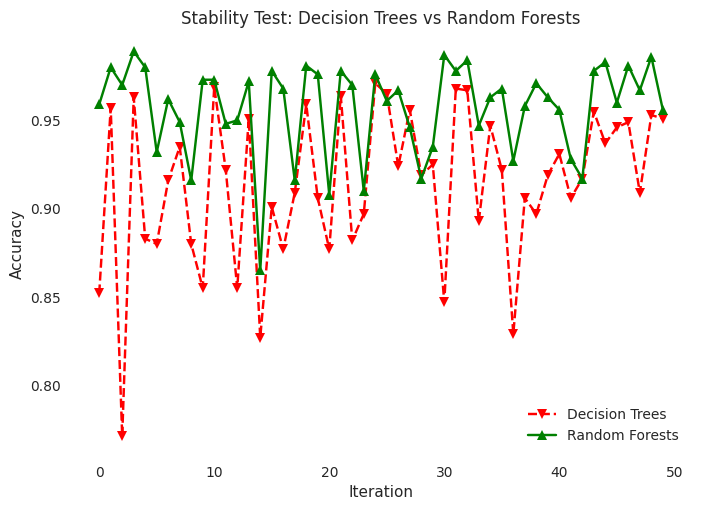

In [35]:
import matplotlib.pyplot as plt
plt.plot(treeDat, "rv--", label="Decision Trees")
plt.plot(forestDat, "g^-", label="Random Forests")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Stability Test: Decision Trees vs Random Forests")
plt.show()

In [36]:
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import time
ar = np.vstack([\
    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size=10000),\
    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size=10000),
])

X = ar
y = np.array([0] * int(ar.shape[0] / 2) + [1] * int(ar.shape[0] / 2))
clf_svm = svm.SVC()
start_time_svm = time.time()
clf_svm.fit(X, y)
end_time_svm = time.time()
print("Time taken for SVM: {:.6f} seconds".format(end_time_svm - start_time_svm))
clf_rf = RandomForestClassifier(n_estimators=10)
start_time_rf = time.time()
clf_rf.fit(X, y)
end_time_rf = time.time()
print("Time taken for Random Forests: {:.6f} seconds".format(end_time_rf - start_time_rf))


Time taken for SVM: 4.092784 seconds
Time taken for Random Forests: 0.255573 seconds
